# GETAROUND Project: deployment machine learning module

The following analysis is being done as a mandatory project for certification bloc 5 (Machine Learning Engineer at Jedha).

In the scope of the project: 

Part 1 : Implementation of a minimum delay between two rentals 

1. Understanding the business context of the given data through EDA:
    - Analysis of delays in car returns and conflicts (getaround_delay_analysis dataset)
    - Simulating minimum thresholds of delay for better decision-making
    - Conclusions
2. Creating a visual dashboard with Streamlit (hosted on Hugging Face)

Part 2 : Machine Learning pricing optimization model - training and deployment

3. Building a ML model for pricing optimization on the basis of the given data
    - Analysis of the pricing dataset and data pre-processing
    - Training 3 different ML models for pricing optimization
    - Best model selection based on evaluation metrics
4. Builiding an API to create a /predict endpoint for pricing predictions 
based on the previously created ML model
5. Preparing the API Documentation to provide clear usage instructions at /docs.
6. Deployment: hosting everything online

# Part 2 : Machine Learning pricing optimization model - training and deployment

## Step 1: Analysis of the pricing dataset

In [1]:
# Setting up the environment

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error, r2_score
import joblib

In [2]:
# Loading the dataset
df = pd.read_csv("../data/get_around_pricing_project.csv")
df.head()


,Unnamed: 0,model_key,mileage,engine_power,fuel,paint_color,car_type,private_parking_available,has_gps,has_air_conditioning,automatic_car,has_getaround_connect,has_speed_regulator,winter_tires,rental_price_per_day
0,0,Citroën,140411,100,diesel,black,convertible,True,True,False,False,True,True,True,106
1,1,Citroën,13929,317,petrol,grey,convertible,True,True,False,False,False,True,True,264
2,2,Citroën,183297,120,diesel,white,convertible,False,False,False,False,True,False,True,101
3,3,Citroën,128035,135,diesel,red,convertible,True,True,False,False,True,True,True,158
4,4,Citroën,97097,160,diesel,silver,convertible,True,True,False,False,False,True,True,183


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4843 entries, 0 to 4842
Data columns (total 15 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   Unnamed: 0                 4843 non-null   int64 
 1   model_key                  4843 non-null   object
 2   mileage                    4843 non-null   int64 
 3   engine_power               4843 non-null   int64 
 4   fuel                       4843 non-null   object
 5   paint_color                4843 non-null   object
 6   car_type                   4843 non-null   object
 7   private_parking_available  4843 non-null   bool  
 8   has_gps                    4843 non-null   bool  
 9   has_air_conditioning       4843 non-null   bool  
 10  automatic_car              4843 non-null   bool  
 11  has_getaround_connect      4843 non-null   bool  
 12  has_speed_regulator        4843 non-null   bool  
 13  winter_tires               4843 non-null   bool  
 14  rental_p

In [4]:
# Checking for missing values
df.isnull().sum()

Unnamed: 0                   0
model_key                    0
mileage                      0
engine_power                 0
fuel                         0
paint_color                  0
car_type                     0
private_parking_available    0
has_gps                      0
has_air_conditioning         0
automatic_car                0
has_getaround_connect        0
has_speed_regulator          0
winter_tires                 0
rental_price_per_day         0
dtype: int64

In [5]:
# Checking basic statistics
df.describe()

,Unnamed: 0,mileage,engine_power,rental_price_per_day
count,4843.000000,4.843000e+03,4843.00000,4843.000000
mean,2421.000000,1.409628e+05,128.98823,121.214536
std,1398.198007,6.019674e+04,38.99336,33.568268
min,0.000000,-6.400000e+01,0.00000,10.000000
25%,1210.500000,1.029135e+05,100.00000,104.000000
50%,2421.000000,1.410800e+05,120.00000,119.000000
75%,3631.500000,1.751955e+05,135.00000,136.000000
max,4842.000000,1.000376e+06,423.00000,422.000000


Interpretation:
This dataset is clean and rich, exactly what is needed for building a solid pricing model.
We’ve got 4,843 rows and 15 columns, including:
- Target Variable: rental_price_per_day (this is to be predicted)
- Features:
    - Numerical: mileage, engine_power
    - Categorical: model_key, fuel, paint_color, car_type
    - Boolean: private_parking_available, has_gps, has_air_conditioning, automatic_car, has_getaround_connect, has_speed_regulator, winter_tires

### Enhanced Exploratory Data Analysis (EDA)

Let's dive deeper into the data to understand pricing patterns, detect outliers, and identify key relationships that will inform our modeling approach.

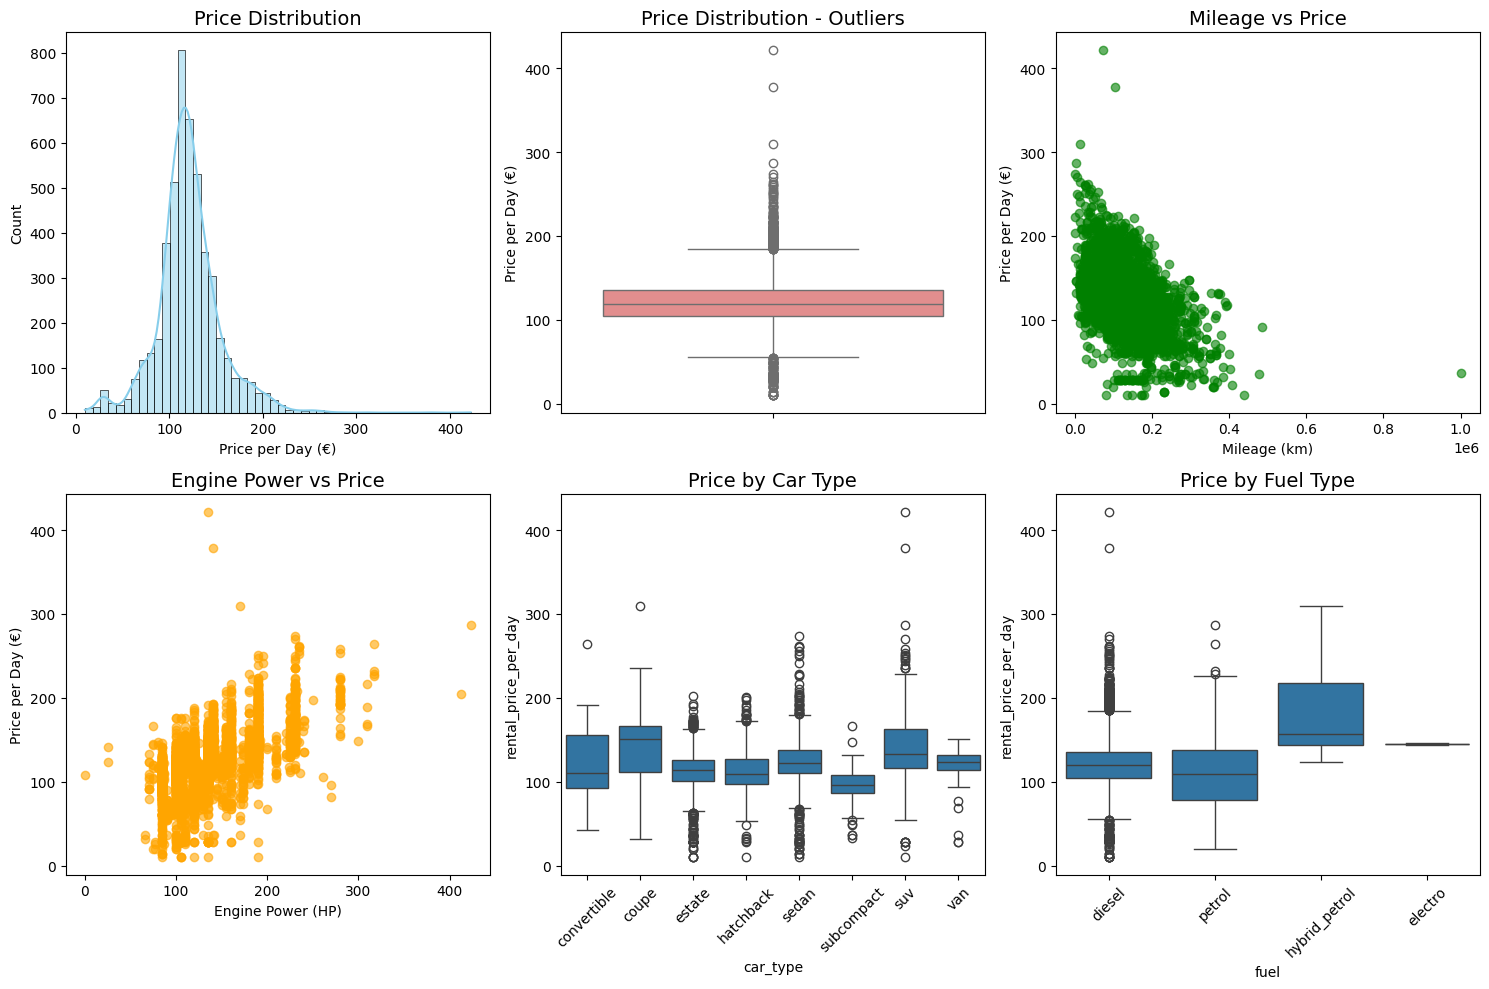

In [6]:
# 1. Price Distribution Analysis
plt.figure(figsize=(15, 10))

# Price distribution
plt.subplot(2, 3, 1)
sns.histplot(df['rental_price_per_day'], bins=50, kde=True, color='skyblue')
plt.title('Price Distribution', fontsize=14)
plt.xlabel('Price per Day (€)')

# Price boxplot for outlier detection
plt.subplot(2, 3, 2)
sns.boxplot(y=df['rental_price_per_day'], color='lightcoral')
plt.title('Price Distribution - Outliers', fontsize=14)
plt.ylabel('Price per Day (€)')

# Mileage vs Price
plt.subplot(2, 3, 3)
plt.scatter(df['mileage'], df['rental_price_per_day'], alpha=0.6, color='green')
plt.title('Mileage vs Price', fontsize=14)
plt.xlabel('Mileage (km)')
plt.ylabel('Price per Day (€)')

# Engine Power vs Price
plt.subplot(2, 3, 4)
plt.scatter(df['engine_power'], df['rental_price_per_day'], alpha=0.6, color='orange')
plt.title('Engine Power vs Price', fontsize=14)
plt.xlabel('Engine Power (HP)')
plt.ylabel('Price per Day (€)')

# Price by Car Type
plt.subplot(2, 3, 5)
sns.boxplot(data=df, x='car_type', y='rental_price_per_day')
plt.title('Price by Car Type', fontsize=14)
plt.xticks(rotation=45)

# Price by Fuel Type
plt.subplot(2, 3, 6)
sns.boxplot(data=df, x='fuel', y='rental_price_per_day')
plt.title('Price by Fuel Type', fontsize=14)
plt.xticks(rotation=45)

plt.tight_layout()
plt.show()

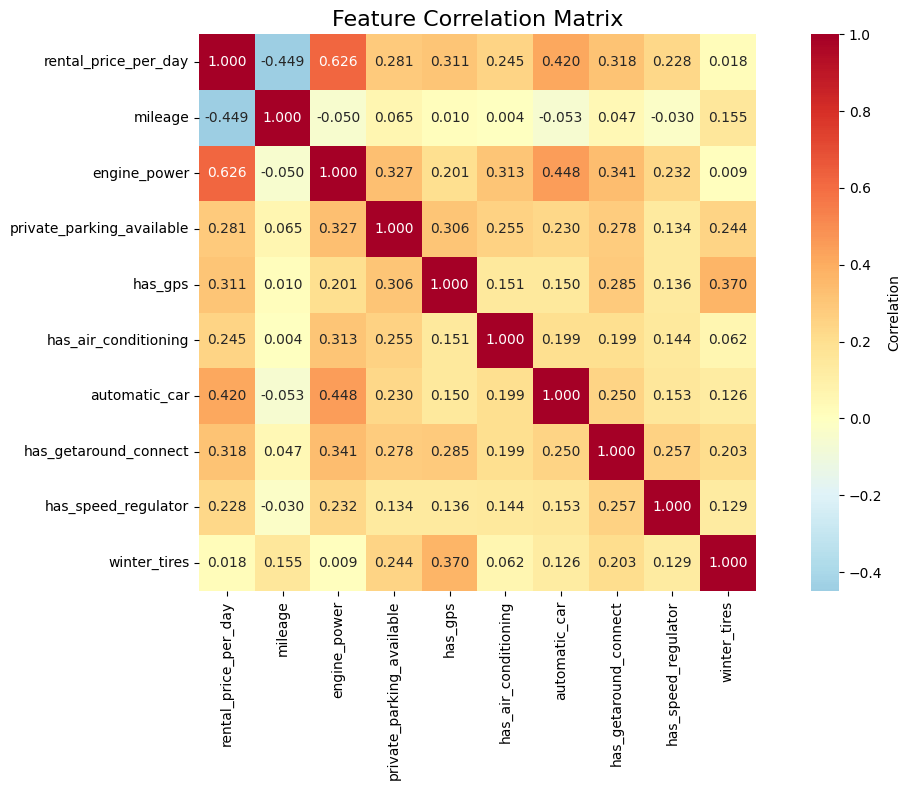

🎯 Key Correlations with Rental Price:
   engine_power: 0.626
   mileage: -0.449
   automatic_car: 0.420
   has_getaround_connect: 0.318
   has_gps: 0.311
   private_parking_available: 0.281
   has_air_conditioning: 0.245
   has_speed_regulator: 0.228


In [7]:
# 2. Correlation Analysis
plt.figure(figsize=(12, 8))

# Select numerical columns for correlation
numerical_cols = ['rental_price_per_day', 'mileage', 'engine_power']
boolean_cols = ['private_parking_available', 'has_gps', 'has_air_conditioning', 
                'automatic_car', 'has_getaround_connect', 'has_speed_regulator', 'winter_tires']

# Combine for correlation matrix
corr_data = df[numerical_cols + boolean_cols]
correlation_matrix = corr_data.corr()

# Create heatmap
sns.heatmap(correlation_matrix, annot=True, cmap='RdYlBu_r', center=0, 
           fmt='.3f', square=True, cbar_kws={'label': 'Correlation'})
plt.title('Feature Correlation Matrix', fontsize=16)
plt.tight_layout()
plt.show()

# Print key correlations with price
print("🎯 Key Correlations with Rental Price:")
price_correlations = correlation_matrix['rental_price_per_day'].sort_values(key=abs, ascending=False)
for feature, corr in price_correlations.items():
    if feature != 'rental_price_per_day' and abs(corr) > 0.1:
        print(f"   {feature}: {corr:.3f}")

In [8]:
# 3. Outlier Detection and Business Insights
print("📊 DATA QUALITY ANALYSIS")
print("=" * 50)

# Price statistics
price_stats = df['rental_price_per_day'].describe()
q1 = price_stats['25%']
q3 = price_stats['75%']
iqr = q3 - q1
lower_bound = q1 - 1.5 * iqr
upper_bound = q3 + 1.5 * iqr

outliers = df[(df['rental_price_per_day'] < lower_bound) | 
              (df['rental_price_per_day'] > upper_bound)]

print(f"💰 PRICE ANALYSIS:")
print(f"   Mean price: €{price_stats['mean']:.2f}")
print(f"   Median price: €{price_stats['50%']:.2f}")
print(f"   Price range: €{price_stats['min']:.2f} - €{price_stats['max']:.2f}")
print(f"   Outliers detected: {len(outliers)} ({len(outliers)/len(df)*100:.1f}%)")

# Mileage analysis
mileage_high = df[df['mileage'] > df['mileage'].quantile(0.95)]
print(f"\n🚗 MILEAGE ANALYSIS:")
print(f"   Mean mileage: {df['mileage'].mean():,.0f} km")
print(f"   High-mileage cars (>95th percentile): {len(mileage_high)} cars")

# Feature value counts for categorical variables
print(f"\n🎨 CATEGORICAL FEATURES:")
print(f"   Car types: {df['car_type'].nunique()} ({', '.join(df['car_type'].unique())})")
print(f"   Fuel types: {df['fuel'].nunique()} ({', '.join(df['fuel'].unique())})")
print(f"   Paint colors: {df['paint_color'].nunique()} unique colors")
print(f"   Car models: {df['model_key'].nunique()} unique models")

📊 DATA QUALITY ANALYSIS
💰 PRICE ANALYSIS:
   Mean price: €121.21
   Median price: €119.00
   Price range: €10.00 - €422.00
   Outliers detected: 345 (7.1%)

🚗 MILEAGE ANALYSIS:
   Mean mileage: 140,963 km
   High-mileage cars (>95th percentile): 243 cars

🎨 CATEGORICAL FEATURES:
   Car types: 8 (convertible, coupe, estate, hatchback, sedan, subcompact, suv, van)
   Fuel types: 4 (diesel, petrol, hybrid_petrol, electro)
   Paint colors: 10 unique colors
   Car models: 28 unique models


## Step 2: Data Preprocessing

In [9]:
# Dropping unnecessary columns
df.drop(columns=["Unnamed: 0"], inplace=True)

In [10]:
# Encoding categorical variables (This will convert model_key, fuel, paint_color, 
# and car_type into binary columns)
df_encoded = pd.get_dummies(df, drop_first=True)
df_encoded.head()

,mileage,engine_power,private_parking_available,has_gps,has_air_conditioning,automatic_car,has_getaround_connect,has_speed_regulator,winter_tires,rental_price_per_day,...,paint_color_red,paint_color_silver,paint_color_white,car_type_coupe,car_type_estate,car_type_hatchback,car_type_sedan,car_type_subcompact,car_type_suv,car_type_van
0,140411,100,True,True,False,False,True,True,True,106,...,False,False,False,False,False,False,False,False,False,False
1,13929,317,True,True,False,False,False,True,True,264,...,False,False,False,False,False,False,False,False,False,False
2,183297,120,False,False,False,False,True,False,True,101,...,False,False,True,False,False,False,False,False,False,False
3,128035,135,True,True,False,False,True,True,True,158,...,True,False,False,False,False,False,False,False,False,False
4,97097,160,True,True,False,False,False,True,True,183,...,False,True,False,False,False,False,False,False,False,False


In [11]:
# Scaling numerical features (mileage and engine_power)

scaler = StandardScaler()
df_encoded[['mileage', 'engine_power']] = scaler.fit_transform(df_encoded[['mileage', 'engine_power']])
df_encoded.head()

,mileage,engine_power,private_parking_available,has_gps,has_air_conditioning,automatic_car,has_getaround_connect,has_speed_regulator,winter_tires,rental_price_per_day,...,paint_color_red,paint_color_silver,paint_color_white,car_type_coupe,car_type_estate,car_type_hatchback,car_type_sedan,car_type_subcompact,car_type_suv,car_type_van
0,-0.009168,-0.743491,True,True,False,False,True,True,True,106,...,False,False,False,False,False,False,False,False,False,False
1,-2.110528,4.822133,True,True,False,False,False,True,True,264,...,False,False,False,False,False,False,False,False,False,False
2,0.703337,-0.230530,False,False,False,False,True,False,True,101,...,False,False,True,False,False,False,False,False,False,False
3,-0.214781,0.154190,True,True,False,False,True,True,True,158,...,True,False,False,False,False,False,False,False,False,False
4,-0.728782,0.795391,True,True,False,False,False,True,True,183,...,False,True,False,False,False,False,False,False,False,False


In [12]:
# Defining features and target variable
X = df_encoded.drop(columns=['rental_price_per_day'])
y = df_encoded['rental_price_per_day']

In [13]:
# Splitting the data into training and testing sets

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Now X_train, X_test, y_train, and y_test are ready for model training and evaluation

## Step 3: Building the ML model for price optimization

In [14]:
# Training and evaluating the first model - Linear Regression

lr_model = LinearRegression()
lr_model.fit(X_train, y_train)

# Predict
y_pred_lr = lr_model.predict(X_test)

# Evaluation metrics for Linear Regression
rmse_lr = np.sqrt(mean_squared_error(y_test, y_pred_lr))
mae_lr = mean_absolute_error(y_test, y_pred_lr)
r2_lr = r2_score(y_test, y_pred_lr)

print(f"Linear Regression RMSE: {rmse_lr:.2f}")
print(f"Linear Regression MAE: {mae_lr:.2f}")
print(f"Linear Regression R²: {r2_lr:.4f}")

Linear Regression RMSE: 17.96
Linear Regression MAE: 12.12
Linear Regression R²: 0.6937


In [15]:
# Training and evaluating the second model - Random Forest Regressor

rf_model = RandomForestRegressor(random_state=42)
rf_model.fit(X_train, y_train)

y_pred_rf = rf_model.predict(X_test)

# Evaluation metrics for Random Forest Regressor
rmse_rf = np.sqrt(mean_squared_error(y_test, y_pred_rf))
mae_rf = mean_absolute_error(y_test, y_pred_rf)
r2_rf = r2_score(y_test, y_pred_rf)

print(f"Random Forest RMSE: {rmse_rf:.2f}")
print(f"Random Forest MAE: {mae_rf:.2f}")
print(f"Random Forest R²: {r2_rf:.4f}")

Random Forest RMSE: 16.80
Random Forest MAE: 10.71
Random Forest R²: 0.7320


In [16]:
# Training and evaluating the third model - XGBoost Regressor

xgb_model = XGBRegressor(random_state=42)
xgb_model.fit(X_train, y_train)

y_pred_xgb = xgb_model.predict(X_test)

# Evaluation metrics for XGBoost Regressor
rmse_xgb = np.sqrt(mean_squared_error(y_test, y_pred_xgb))
mae_xgb = mean_absolute_error(y_test, y_pred_xgb)
r2_xgb = r2_score(y_test, y_pred_xgb)

print(f"XGBoost RMSE: {rmse_xgb:.2f}")
print(f"XGBoost MAE: {mae_xgb:.2f}")
print(f"XGBoost R²: {r2_xgb:.4f}")

XGBoost RMSE: 16.78
XGBoost MAE: 10.56
XGBoost R²: 0.7326


Let's try some further tuning to see if the model performance mesured by the a/m metrics can be enhanced.

In [18]:
# Hyperparameter tuning for XGBoost Regressor using GridSearchCV

from xgboost import XGBRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_absolute_error, r2_score

# Define the model
xgb = XGBRegressor(random_state=42)

# Define the hyperparameter grid
param_grid = {
    'max_depth': [3, 5, 7],
    'learning_rate': [0.01, 0.1, 0.3],
    'n_estimators': [100, 200, 300],
    'subsample': [0.8, 1.0]
}

# Set up GridSearchCV
grid_search = GridSearchCV(
    estimator=xgb,
    param_grid=param_grid,
    cv=5,
    scoring='neg_root_mean_squared_error',
    verbose=1,
    n_jobs=-1
)

# Fit to training data
grid_search.fit(X_train, y_train)

# Best model and score

print("Best RMSE:", -grid_search.best_score_)
print("Best Parameters:", grid_search.best_params_)

# Additional metrics can be calculated by predicting on the test set

best_model = grid_search.best_estimator_

y_pred = best_model.predict(X_test)

mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Optimized MAE: {mae:.2f}")
print(f"Optimized R² Score: {r2:.2f}")


Fitting 5 folds for each of 54 candidates, totalling 270 fits
Best RMSE: 16.331990814208986
Best Parameters: {'learning_rate': 0.1, 'max_depth': 5, 'n_estimators': 300, 'subsample': 1.0}
Optimized MAE: 10.10
Optimized R² Score: 0.76


🚗 MODEL PERFORMANCE COMPARISON (ALL MODELS)
              Model    RMSE     MAE     R²
  Linear Regression 17.9605 12.1153 0.6937
      Random Forest 16.8022 10.7069 0.7320
    XGBoost (Basic) 16.7810 10.5574 0.7326
XGBoost (Optimized) 16.3320 10.0977 0.7611

🏆 BEST PERFORMANCE BY METRIC:
------------------------------
Lowest RMSE: XGBoost (Optimized) (16.3320)
Lowest MAE:  XGBoost (Optimized) (10.0977)
Highest R²:  XGBoost (Optimized) (0.7611)

📊 OVERALL RANKING (by R² Score):
-----------------------------------
4. XGBoost (Optimized) - R²: 0.7611
3. XGBoost (Basic) - R²: 0.7326
2. Random Forest - R²: 0.7320
1. Linear Regression - R²: 0.6937

💡 FINAL RECOMMENDATION:
-------------------------
The XGBoost (Optimized) is the optimal choice with:
• Highest R² score: 0.7611
• Best balance of bias-variance trade-off for price prediction
• Improvement over basic XGBoost: +0.0284 R² points


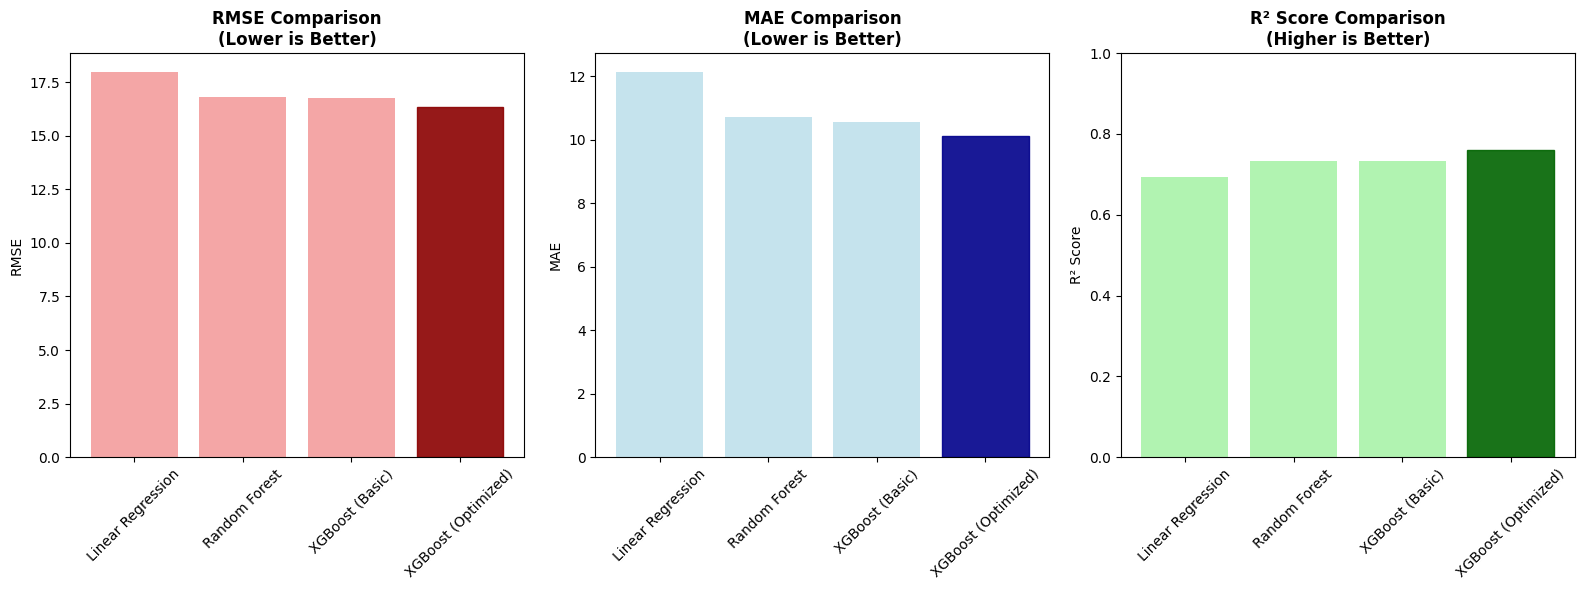


✅ COMPLETE ANALYSIS: All 4 models compared successfully!
🎯 The GridSearchCV optimization shows the final performance gains


In [ ]:
# Model Performance Summary and Comparison

# Collecting metrics for all models

try:
    # Try to get optimized XGBoost metrics (available after GridSearchCV cell is executed)
    rmse_xgb_opt = -grid_search.best_score_
    mae_xgb_opt = mae  # from the GridSearchCV cell
    r2_xgb_opt = r2    # from the GridSearchCV cell
    models_list = ['Linear Regression', 'Random Forest', 'XGBoost (Basic)', 'XGBoost (Optimized)']
    rmse_list = [rmse_lr, rmse_rf, rmse_xgb, rmse_xgb_opt]
    mae_list = [mae_lr, mae_rf, mae_xgb, mae_xgb_opt]
    r2_list = [r2_lr, r2_rf, r2_xgb, r2_xgb_opt]
except NameError:
    # Fallback if GridSearchCV hasn't been run yet
    print("⚠️  Note: GridSearchCV optimization hasn't been executed yet. Showing first 3 models only.")
    models_list = ['Linear Regression', 'Random Forest', 'XGBoost (Basic)']
    rmse_list = [rmse_lr, rmse_rf, rmse_xgb]
    mae_list = [mae_lr, mae_rf, mae_xgb]
    r2_list = [r2_lr, r2_rf, r2_xgb]

# Create a comprehensive comparison of all models
models_comparison = pd.DataFrame({
    'Model': models_list,
    'RMSE': rmse_list,
    'MAE': mae_list,
    'R²': r2_list
})

# Display the comparison table
print("🚗 MODEL PERFORMANCE COMPARISON (ALL MODELS)")
print("=" * 55)
print(models_comparison.to_string(index=False, float_format='%.4f'))
print()

# Find the best performing model for each metric
best_rmse = models_comparison.loc[models_comparison['RMSE'].idxmin()]
best_mae = models_comparison.loc[models_comparison['MAE'].idxmin()]
best_r2 = models_comparison.loc[models_comparison['R²'].idxmax()]

print("🏆 BEST PERFORMANCE BY METRIC:")
print("-" * 30)
print(f"Lowest RMSE: {best_rmse['Model']} ({best_rmse['RMSE']:.4f})")
print(f"Lowest MAE:  {best_mae['Model']} ({best_mae['MAE']:.4f})")
print(f"Highest R²:  {best_r2['Model']} ({best_r2['R²']:.4f})")
print()

# Overall ranking based on R² score (best indicator for regression)
models_ranked = models_comparison.sort_values('R²', ascending=False)
print("📊 OVERALL RANKING (by R² Score):")
print("-" * 35)
for idx, row in models_ranked.iterrows():
    rank = idx + 1
    print(f"{rank}. {row['Model']} - R²: {row['R²']:.4f}")

print()
print("💡 FINAL RECOMMENDATION:")
print("-" * 25)
best_model_name = models_ranked.iloc[0]['Model']
best_r2_score = models_ranked.iloc[0]['R²']
print(f"The {best_model_name} is the optimal choice with:")
print(f"• Highest R² score: {best_r2_score:.4f}")
print(f"• Best balance of bias-variance trade-off for price prediction")
if len(models_list) == 4:
    improvement = models_ranked.iloc[0]['R²'] - r2_xgb
    print(f"• Improvement over basic XGBoost: +{improvement:.4f} R² points")

# Visualization of model comparison
fig, axes = plt.subplots(1, 3, figsize=(16, 6))

# RMSE comparison
bars1 = axes[0].bar(models_comparison['Model'], models_comparison['RMSE'], 
                   color='lightcoral', alpha=0.7)
axes[0].set_title('RMSE Comparison\n(Lower is Better)', fontsize=12, fontweight='bold')
axes[0].set_ylabel('RMSE')
axes[0].tick_params(axis='x', rotation=45)

# MAE comparison  
bars2 = axes[1].bar(models_comparison['Model'], models_comparison['MAE'], 
                   color='lightblue', alpha=0.7)
axes[1].set_title('MAE Comparison\n(Lower is Better)', fontsize=12, fontweight='bold')
axes[1].set_ylabel('MAE')
axes[1].tick_params(axis='x', rotation=45)

# R² comparison
bars3 = axes[2].bar(models_comparison['Model'], models_comparison['R²'], 
                   color='lightgreen', alpha=0.7)
axes[2].set_title('R² Score Comparison\n(Higher is Better)', fontsize=12, fontweight='bold')
axes[2].set_ylabel('R² Score')
axes[2].tick_params(axis='x', rotation=45)
axes[2].set_ylim(0, 1)

# Highlight the best performers
best_rmse_idx = models_comparison['RMSE'].idxmin()
best_mae_idx = models_comparison['MAE'].idxmin()  
best_r2_idx = models_comparison['R²'].idxmax()

bars1[best_rmse_idx].set_color('darkred')
bars1[best_rmse_idx].set_alpha(0.9)

bars2[best_mae_idx].set_color('darkblue')
bars2[best_mae_idx].set_alpha(0.9)

bars3[best_r2_idx].set_color('darkgreen')
bars3[best_r2_idx].set_alpha(0.9)

plt.tight_layout()
plt.show()

print("\n" + "="*65)
if len(models_list) == 4:
    print("✅ COMPLETE ANALYSIS: All 4 models compared successfully!")
    print("🎯 The GridSearchCV optimization shows the final performance gains")
else:
    print("⏳ PARTIAL ANALYSIS: Run the GridSearchCV cell to see all 4 models")
print("="*65)

Interpretation:

Comparing the three above trained models RMSE metrics, we can clearly see that the best performing one is XGBoost. However, to enhance the performance of the model, we've tried some optimization which seems to work comparing to the previous metrics. Let's see if we can obtain even better results.

## Step 4: Save the optimal trained ML model for pricing

In [18]:
# Defining the feature order
feature_order = X.columns.tolist()
print("Feature order:", feature_order)

Feature order: ['mileage', 'engine_power', 'private_parking_available', 'has_gps', 'has_air_conditioning', 'automatic_car', 'has_getaround_connect', 'has_speed_regulator', 'winter_tires', 'model_key_Audi', 'model_key_BMW', 'model_key_Citroën', 'model_key_Ferrari', 'model_key_Fiat', 'model_key_Ford', 'model_key_Honda', 'model_key_KIA Motors', 'model_key_Lamborghini', 'model_key_Lexus', 'model_key_Maserati', 'model_key_Mazda', 'model_key_Mercedes', 'model_key_Mini', 'model_key_Mitsubishi', 'model_key_Nissan', 'model_key_Opel', 'model_key_PGO', 'model_key_Peugeot', 'model_key_Porsche', 'model_key_Renault', 'model_key_SEAT', 'model_key_Subaru', 'model_key_Suzuki', 'model_key_Toyota', 'model_key_Volkswagen', 'model_key_Yamaha', 'fuel_electro', 'fuel_hybrid_petrol', 'fuel_petrol', 'paint_color_black', 'paint_color_blue', 'paint_color_brown', 'paint_color_green', 'paint_color_grey', 'paint_color_orange', 'paint_color_red', 'paint_color_silver', 'paint_color_white', 'car_type_coupe', 'car_type

In [19]:
# Saving the best optimized model and feature order
model = best_model
feature_order = X_train.columns.tolist()
joblib.dump(best_model, '../models/best_xgb_model.pkl')


['../models/best_xgb_model.pkl']

Saving the selected model as well as feature order will be necessary for creating the API and its deployment. The model trained on the known data will now be able to generate predictions given some input introduced by the user (=> new data unknown to the model). This input however must follow strictly the same feature order as the one that was used to train the model, otherwise the prediction will not be given.

To facilitate the input to the user and avoid potential errors, a smart input encoder was added to the API in order to be user-friendly and meaningful.